<h1>В данной работе реализован регрессионный анализ, построены линии регрессии, осуществлён разведывательный анализ. Данный код является альтернативой некоторой части функционала IBM SPSS Statistics.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Номер периода                36 non-null     int64  
 1   Продажи от основных фирм     36 non-null     float64
 2   Общие продажи cумма          36 non-null     float64
 3   Продажи от основных товаров  36 non-null     float64
 4   Себестоимость                36 non-null     float64
 5   Число покупателей            36 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.8 KB
       Номер периода  Продажи от основных фирм   Общие продажи cумма  \
count      36.000000               3.600000e+01         3.600000e+01   
mean       18.500000               6.660305e+05         2.243515e+06   
std        10.535654               5.797452e+05         1.203365e+06   
min         1.000000               0.000000e+00         1.553263e+05   
25%         9.750000    

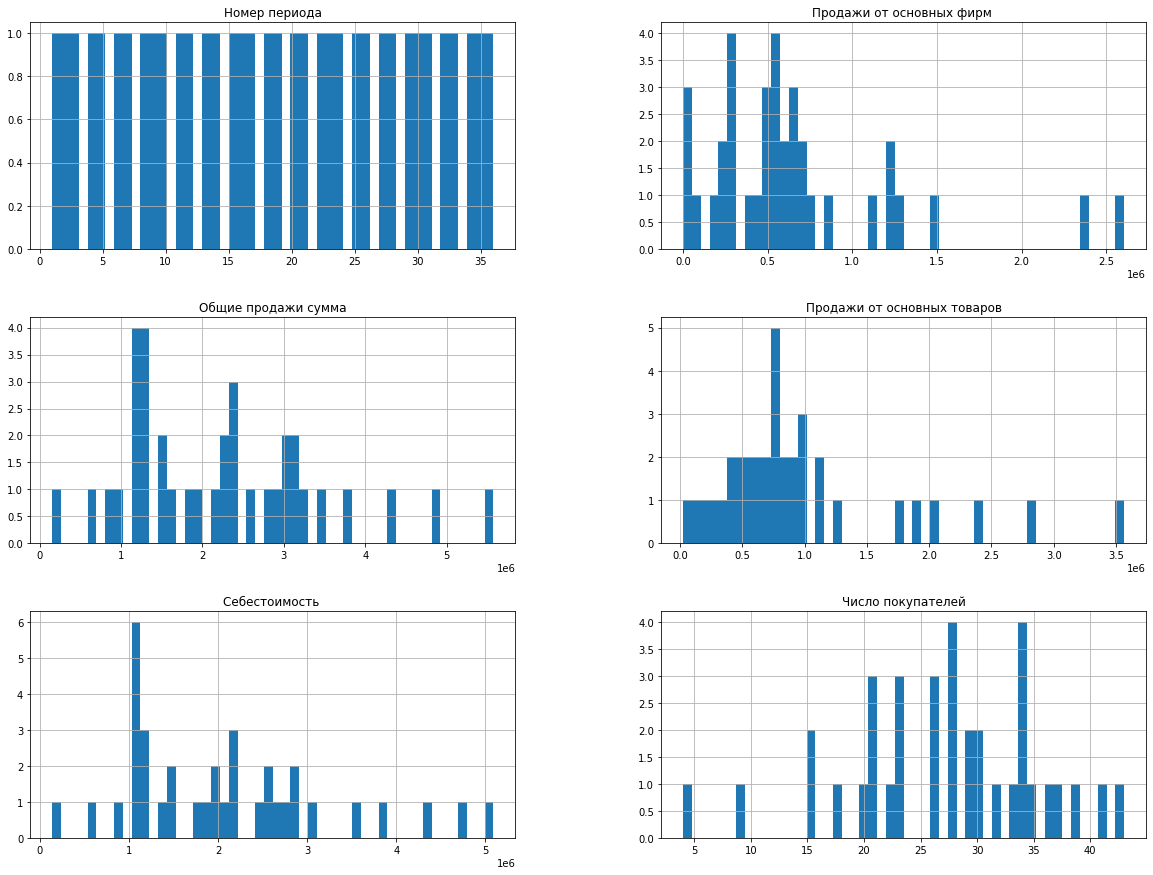

In [22]:
import pandas as pd
import numpy as np
import seaborn as sea


#импортируем данные
df = pd.read_excel('startData2.xls')
a = df.info()
b = df.head()
pd.concat([a,b])


x = df['Номер периода']
y = df['Общие продажи cумма']
sea.regplot(x=x,y=y)
None

print(df.describe(), '\n')

%matplotlib inline
df.hist(bins=50, figsize=(20,15))
None

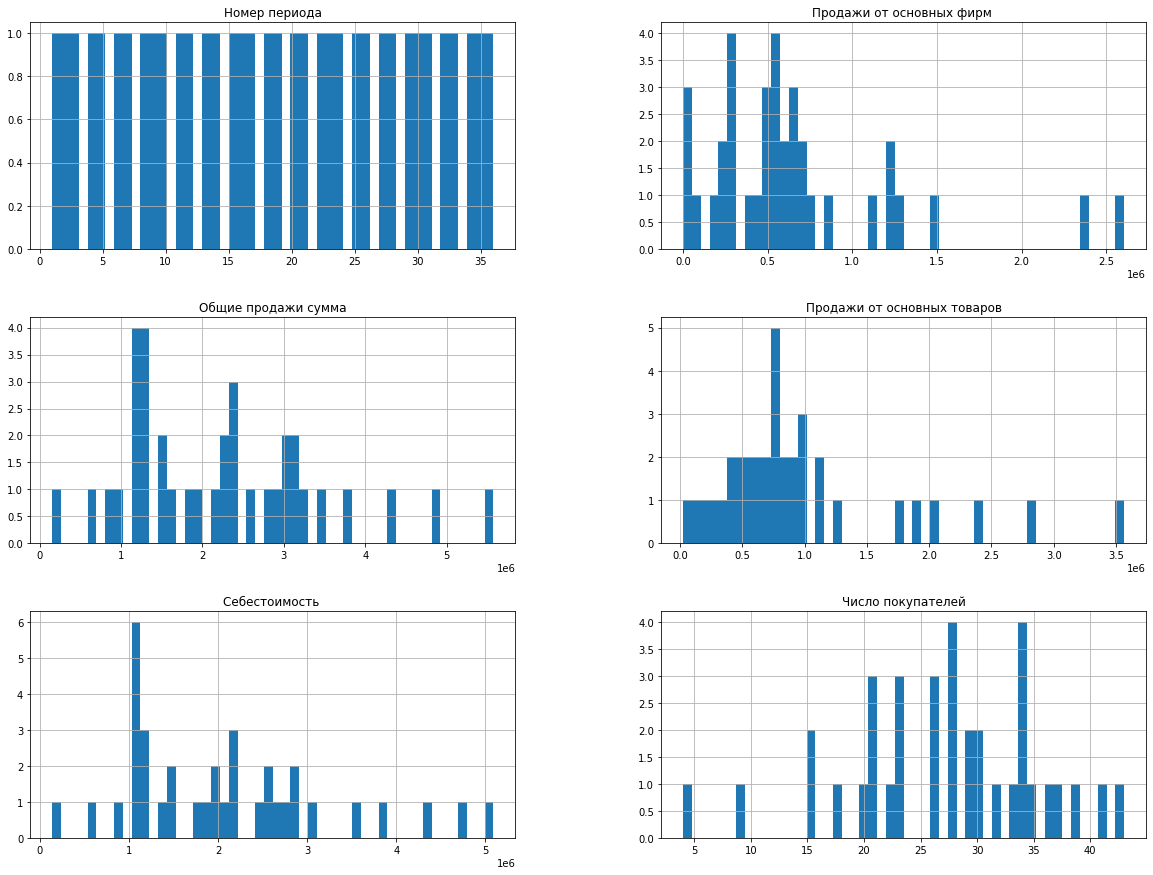

In [23]:
df.describe()
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
None

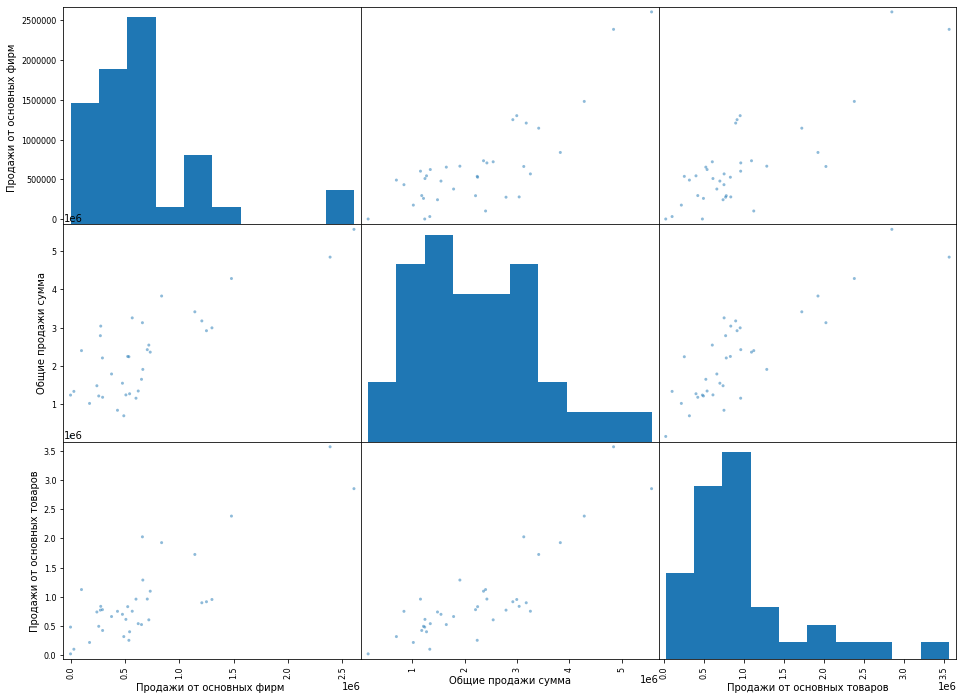

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,1:4], figsize=(16,12))
None

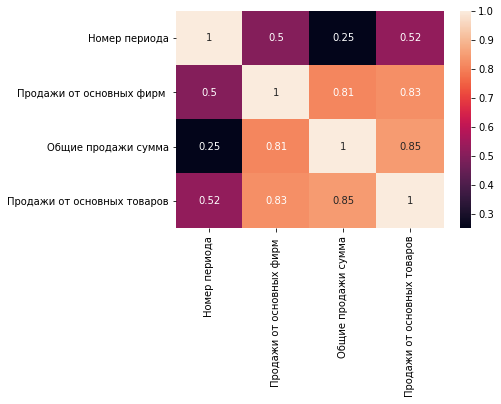

In [25]:
sea.heatmap(df.iloc[:,:4].corr(),
                cbar = True,
                annot = True)
None

In [26]:
x = df.drop(['Общие продажи cумма', 'Число покупателей'], axis=1)
y = df['Общие продажи cумма']
decimals = 0

In [27]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(x,y)

y_pred = np.around(slr.predict(x), decimals = 2)
print(f'Полученное уравнение регрессии: \nY = {np.around(slr.coef_[0], decimals=3)} * x1 + {np.around(slr.coef_[1],decimals=3)} * x2 + {np.around(slr.coef_[2], decimals=3)} * x3 + {np.around(slr.intercept_,decimals=3)}')

LinAlgError: SVD did not converge in Linear Least Squares

In [28]:
y_preds = pd.DataFrame(index = np.arange(1,37))
y_preds['Linear']=y_pred
y.index = pd.RangeIndex(start = 1, stop = 37, step = 1)
y_preds['y']=y
y_preds

,Linear,y
1,666773.72,155326.30
2,1396158.15,1237184.99
3,1438870.53,1333837.00
4,2231498.69,2400539.43
5,2602162.33,2791297.32
6,2745739.49,3042478.45
7,3056016.05,3257320.87
8,2564022.02,2545726.44
9,2090817.40,1481333.90
10,1655297.96,2240679.10


In [29]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y,y_pred)
print('Ошибка МАЕ для линейной модели:',MAE)

Ошибка МАЕ для линейной модели: 224387.92944444442
